<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/thermodynamics/mercury_in_gas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Calculation of mercury in natural gas
#@markdown Demonstration of calculations of mercury in natural gas 
%%capture
!pip install neqsim==2.5.35
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import math
%matplotlib inline

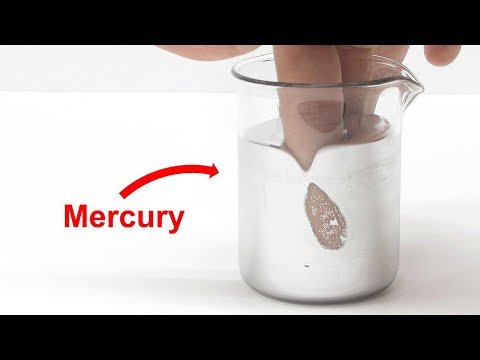

In [0]:
#@title Introduction to Mercury
#@markdown This video gives an intriduction to behavour of mercury as function of pressure and temperature
from IPython.display import YouTubeVideo
YouTubeVideo('ZiWlthrtneU', width=600, height=400)

# Calculation of boiling point of mercury

In the following example we use PR/SRK to claculate the boiling point of mercury. Srk Twu Coon EoS has been fitted to vapour pressure of mercury, and  interaction parameters between mercury and hydrocarbons have been fitted to experimental data.

triple point temperature  234.3 [K] and pressure  3.9662e-05 [bara]
critical temperature  1735.15 [K] and pressure  1608.0 [bara]
error calculating bublepoint


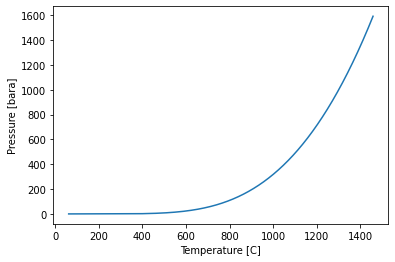

In [0]:
camponentName = "mercury"
eos = "pr" #@param ["srk", "pr", "srk-twu-coon"]
fluid1 = fluid(eos) #create a fluid using the SRK-EoS
fluid1.addComponent(camponentName, 1.0) #adding 1 mole methane to the fluid

TTrip = fluid1.getPhase(0).getComponent(camponentName).getTriplePointTemperature()
PTrip = fluid1.getPhase(0).getComponent(camponentName).getTriplePointPressure()
Tcritical = fluid1.getPhase(0).getComponent(camponentName).getTC()
Pcritical = fluid1.getPhase(0).getComponent(camponentName).getPC()

fluid1.setTemperature(TTrip)
fluid1.setPressure(PTrip)
print('triple point temperature ', TTrip, "[K] and pressure ", PTrip, "[bara]")
print('critical temperature ', Tcritical, "[K] and pressure ", Pcritical, "[bara]")

def bubleP(pressure):
    fluid1.setPressure(pressure)
    bubt(fluid1)
    return fluid1.getTemperature('C')

pressure = np.arange(PTrip, Pcritical-15.0, 1.0)
temperature = [bubleP(P) for P in pressure]

plt.plot(temperature, pressure);
#plt.yscale('log')
plt.xlabel('Temperature [C]');
plt.ylabel('Pressure [bara]');

# A TPflash with mercury

Calculate the composition of a fluid including mercury

In [22]:
componentName = "methane" #@param ["methane", "ethane", "propane", "CO2", "nitrogen"]
temperature = 55.0   #@param {type:"number"}
pressure = 10.0 #@param {type:"number"}


# Creating a fluid in neqsim
fluid1 = fluid('srk-twu-coon') #create a fluid using the SRK-EoS
fluid1.addComponent(componentName, 1.0) 
fluid1.addComponent('mercury', 1.0)
fluid1.setTemperature(temperature)
fluid1.setPressure(pressure)
fluid1.setMixingRule('classic')
fluid1.setMultiPhaseCheck(True)

fluid1.setTemperature(temperature+273.15)
fluid1.setPressure(pressure)
TPflash(fluid1)
fluid1.initPhysicalProperties()
print('mercury in ', fluid1.getPhase(0).getPhaseTypeName(), ' ',fluid1.getPhase(0).getComponent(0).getComponentName(), ' ', fluid1.getPhase(0).getComponent('mercury').getx() , " mole mercury/mole gas")

mercury in  gas   methane   7.539435336729193e-07  mole mercury/mole gas


# Distribution of mercury in gas, oil and water

The following script demonstrates the calculation of mercury distribution in gas, oil and water.

In [0]:
import pandas as pd
# Create a gas-condensate fluid
gascondensate = {'ComponentName':  ["mercury", "water", "nitrogen", "CO2", "methane", "ethane", "propane", "i-butane", "n-butane", "i-pentane", "n-pentane", "n-hexane", "C7", "C8", "C9", "C10", "C11", "C12", "C13", "C14", "C15", "C16", "C17", "C18", "C19", "C20"], 
        'MolarComposition[-]':  [0.00002, 5.0, 2.53, 3.3, 72.98, 7.68, 4.1, 0.7, 1.42, 0.54, 0.67, 0.85, 1.33, 1.33, 0.78, 0.61, 0.42, 0.33, 0.42, 0.24, 0.3, 0.17, 0.21, 0.15, 0.15, 0.8], 
        'MolarMass[kg/mol]': [None,None,None,None, None,None,None,None,None,None,None,None,0.0913, 0.1041, 0.1188, 0.136, 0.150, 0.164, 0.179, 0.188, 0.204, 0.216, 0.236, 0.253, 0.27, 0.391],
        'RelativeDensity[-]': [None,None,None,None, None,None,None,None,None,None,None,None, 0.746, 0.768, 0.79, 0.787, 0.793, 0.804, 0.817, 0.83, 0.835, 0.843, 0.837, 0.84, 0.85, 0.877]
  } 

gascondensatedf = pd.DataFrame(gascondensate) 
print("Gas Condensate Fluid:\n")
print(gascondensatedf.head(30).to_string())
gascondensateFluid = fluid_df(gascondensatedf, lastIsPlusFraction=True).setModel('SRK-TwuCoon-EOS')
gascondensateFluid.setMixingRule('classic')
gascondensateFluid.setPressure(25.0, "bara")
gascondensateFluid.setTemperature(32.0, "C")

TPflash(gascondensateFluid)

printFrame(gascondensateFluid)

Gas Condensate Fluid:

   ComponentName  MolarComposition[-]  MolarMass[kg/mol]  RelativeDensity[-]
0        mercury              0.00002                NaN                 NaN
1          water              5.00000                NaN                 NaN
2       nitrogen              2.53000                NaN                 NaN
3            CO2              3.30000                NaN                 NaN
4        methane             72.98000                NaN                 NaN
5         ethane              7.68000                NaN                 NaN
6        propane              4.10000                NaN                 NaN
7       i-butane              0.70000                NaN                 NaN
8       n-butane              1.42000                NaN                 NaN
9      i-pentane              0.54000                NaN                 NaN
10     n-pentane              0.67000                NaN                 NaN
11      n-hexane              0.85000                

# Mercury solubility in cryogenic processes

In cryogenic processes mercury will typically be in the soild form. Such a calculation is done in neqsim in the follwoing script.

In [0]:
# Create a gas-condensate fluid
gascondensate = {'ComponentName':  ["mercury", "nitrogen", "CO2", "methane", "ethane", "propane", "i-butane", "n-butane", "i-pentane", "n-pentane", "n-hexane"], 
        'MolarComposition[-]':  [0.00002, 0.1, 0.00001, 92.98, 5.68, 4.1, 0.7, 0.42, 0.24, 0.167, 0.1]
} 

gascondensatedf = pd.DataFrame(gascondensate) 
print("Gas Condensate Fluid:\n")
print(gascondensatedf.head(30).to_string())
gascondensateFluid = fluid_df(gascondensatedf, lastIsPlusFraction=True).setModel('SRK-TwuCoon-EOS')
gascondensateFluid.setMixingRule('classic')
gascondensateFluid.setPressure(60.0, "bara")
gascondensateFluid.setTemperature(-160.0, "C")
gascondensateFluid.setMultiPhaseCheck(True)
gascondensateFluid.setSolidPhaseCheck("mercury")
TPflash(gascondensateFluid)

printFrame(gascondensateFluid)

print("mercury in gas/oil ", gascondensateFluid.getPhase(0).getComposition("wtfraction")[0]*1.0e12, " nano gr mercury/ kg gas ")

Gas Condensate Fluid:

   ComponentName  MolarComposition[-]
0        mercury              0.00002
1       nitrogen              0.10000
2            CO2              0.00001
3        methane             92.98000
4         ethane              5.68000
5        propane              4.10000
6       i-butane              0.70000
7       n-butane              0.42000
8      i-pentane              0.24000
9      n-pentane              0.16700
10      n-hexane              0.10000
                          total                 oil               solid                     
            mercury  1.91411E-7         1.03335E-20                 1E0      [mole fraction]
           nitrogen  9.57057E-4          9.57057E-4               1E-20      [mole fraction]
                CO2  9.57057E-8          9.57057E-8               1E-20      [mole fraction]
            methane  8.89871E-1          8.89871E-1               1E-20      [mole fraction]
             ethane  5.43608E-2          5.43608E-2     